In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0.5, 1.0, 'Student Score Prediction')

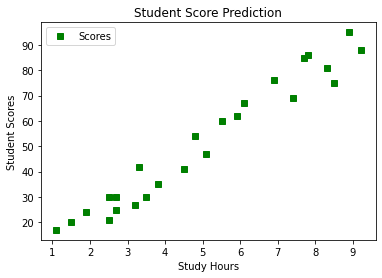

In [4]:
## Visualize data
df.plot(x='Hours',y='Scores',style='sg')
plt.xlabel("Study Hours")
plt.ylabel("Student Scores")
plt.title("Student Score Prediction")

In [5]:
## Dividing dataset
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [6]:
## Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


In [8]:
## Train the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

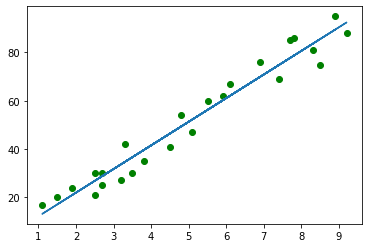

In [9]:
## Plotting test data
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,y,color='green')
plt.plot(X,line)

In [10]:
## Predict score
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [11]:
data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [12]:
data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [13]:
hrs = float(input("Enter study hrs: "))
hours = [[hrs]]
own_pred = regressor.predict(hours)
print("Number of hours = {}".format(hours))
print("\nPrediction Score = {}".format(own_pred[0]))
print("\nThe Prediction Score if a student study for {0} hours/day is {1} %".format(hours,"{:.2f}".format(own_pred[0])))

Enter study hrs: 9
Number of hours = [[9.0]]

Prediction Score = 90.4679155630833

The Prediction Score if a student study for [[9.0]] hours/day is 90.47 %


In [14]:
## Analyze the Model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))
print("r2 Root Mean Squared Error:", r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
r2 Root Mean Squared Error: 0.9568211104435257
